**IMPORTING LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

**IMPORTING DATASET**

In [4]:
titanic=pd.read_csv("titanic.csv")

**DATA PREPROCESSING**

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [8]:
titanic.shape

(1309, 12)

In [9]:
titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

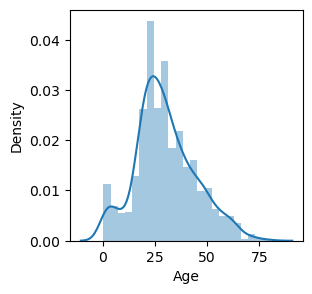

In [10]:
plt.figure(figsize=(3,3))
sns.distplot(titanic.Age)

In [11]:
# WE CAN REPLACE THE MISSING AGE VALUES WITH THE MEDIAN VALUE
titanic['Age'].fillna(titanic['Age'].median(),inplace=True)

In [12]:
# SINCE MORE THAN 3/4th VALUES FROM CABIN ARE MISSING WE WILL DROP IT
titanic=titanic.drop(columns='Cabin', axis=1)

In [13]:
# AS FOR THE FARE AND THE MODE WE WILL REPLACE THEM WITH THE MODE VALUES
titanic['Fare'].fillna(titanic['Fare'].mode()[0],inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [14]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S
1308,1309,0,3,"Peter, Master. Michael J",male,28.0,1,1,2668,22.3583,C


**DATA ANALYSIS**

In [18]:
titanic.value_counts('Survived')

Survived
0    815
1    494
Name: count, dtype: int64

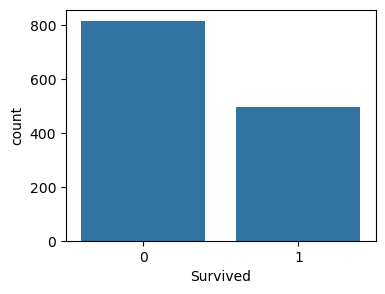

In [19]:
plt.figure(figsize=(4,3))
sns.countplot(x='Survived', data=titanic)
plt.show()

In [20]:
titanic.value_counts(['Survived','Pclass']).sort_index()

Survived  Pclass
0         1         137
          2         160
          3         518
1         1         186
          2         117
          3         191
Name: count, dtype: int64

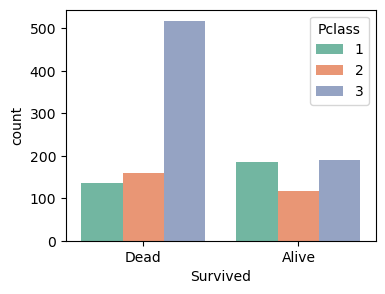

In [21]:
plt.figure(figsize=(4,3))
sns.countplot(x='Survived', hue='Pclass',data=titanic, palette='Set2')
plt.xticks([0, 1], ["Dead", "Alive"])
plt.show()

In [22]:
titanic.value_counts('Sex')

Sex
male      843
female    466
Name: count, dtype: int64

In [23]:
titanic.value_counts(['Sex','Survived']).sort_index()

Sex     Survived
female  0            81
        1           385
male    0           734
        1           109
Name: count, dtype: int64

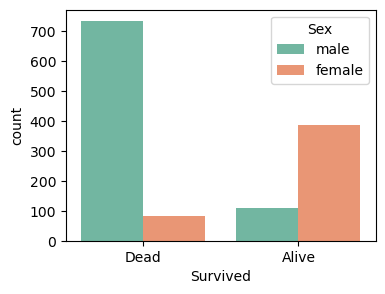

In [24]:
plt.figure(figsize=(4,3))
sns.countplot(x='Survived', hue='Sex',data=titanic, palette='Set2') 
plt.xticks([0, 1], ["Dead", "Alive"])
plt.show()

**LABEL ENCODING**

In [26]:
# CONVERTING CATEGORICAL VALUES INTO NUMERICAL VALUES FOR EASE OF ACCESS
label=LabelEncoder()

In [27]:
titanic['Sex']=label.fit_transform(titanic.Sex)
# FEMALE IS 0 MALE IS 1

In [28]:
titanic['Embarked']=label.fit_transform(titanic.Embarked)
# C IS 0, Q IS 1, S IS 2

In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


**MAKING BALANCED DATASET**

In [31]:
titanic.value_counts('Survived')

Survived
0    815
1    494
Name: count, dtype: int64

In [32]:
surv=titanic[titanic.Survived==1]
not_surv=titanic[titanic.Survived==0]

In [33]:
print(surv.shape)
print(not_surv.shape)

(494, 11)
(815, 11)


In [34]:
not_surv_sample=not_surv.sample(n=494)

In [35]:
#MAKING THE NEW DATAFRAME
new_titanic=pd.concat([surv,not_surv_sample])
type(new_titanic)

pandas.core.frame.DataFrame

In [36]:
new_titanic.shape

(988, 11)

In [37]:
#SHUFFLING THE DATAFRAME TO PROMOTE RANDOMNESS
new_titanic=new_titanic.sample(frac=1).reset_index(drop=True)

In [38]:
new_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,63,0,1,"Harris, Mr. Henry Birkhardt",1,45.0,1,0,36973,83.475,2
1,355,0,3,"Yousif, Mr. Wazli",1,28.0,0,0,2647,7.225,0
2,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",1,35.0,0,0,111426,26.550,0
3,1251,1,3,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...",0,30.0,1,0,349910,15.550,2
4,457,0,1,"Millet, Mr. Francis Davis",1,65.0,0,0,13509,26.550,2


**DROPPING UNNECESSARY COLUMNS**

In [40]:
new_titanic=new_titanic.drop(['PassengerId','Name','Ticket'],axis=1)

In [41]:
new_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,45.0,1,0,83.475,2
1,0,3,1,28.0,0,0,7.225,0
2,1,1,1,35.0,0,0,26.550,0
3,1,3,0,30.0,1,0,15.550,2
4,0,1,1,65.0,0,0,26.550,2


**SPLITTING THE DATA**

In [43]:
X=new_titanic.drop('Survived',axis=1)
Y=new_titanic['Survived']

In [44]:
X_tr,X_ts,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)

In [45]:
print(X.shape,X_tr.shape,X_ts.shape)

(988, 7) (790, 7) (198, 7)


In [46]:
Y_train.value_counts()

Survived
0    395
1    395
Name: count, dtype: int64

In [47]:
Y_test.value_counts()

Survived
1    99
0    99
Name: count, dtype: int64

**STANDARDIZING THE DATA**

In [49]:
scaler=StandardScaler()

In [50]:
X_train=scaler.fit_transform(X_tr)

In [51]:
X_test=scaler.transform(X_ts)

In [52]:
x=scaler.transform(X)

In [53]:
print(X_train.std(),X_test.std())

1.0 0.986526969591977


**MAKING A LOGISTIC REGRESSION MODEL**

In [55]:
titanic_predictor=XGBClassifier()

In [56]:
titanic_predictor.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**TESTING THE ACCURACY**

In [58]:
print(accuracy_score(Y_train,titanic_predictor.predict(X_train)))

0.9670886075949368


In [59]:
print(accuracy_score(Y_test,titanic_predictor.predict(X_test)))

0.8282828282828283


In [60]:
print(accuracy_score(Y,titanic_predictor.predict(x)))

0.9392712550607287


**MAKING A PREDICTIVE MODEL**

In [62]:
column_names=X.columns

In [63]:
inp_data=[]

inp_data.append(int(input("Enter passenger's class : ")))

x=input("Enter passenger's sex : ")
if (x=='male'):
    inp_data.append(1)
else:
    inp_data.append(0)

inp_data.append(int(input("Enter passenger's age : ")))

inp_data.append(int(input("Enter passenger's siblings/spouse : ")))

inp_data.append(int(input("Enter passenger's parents/children : ")))

inp_data.append(float(input("Enter the passenger's fare : ")))

x=input("Enter passenger's embarking destination : ")
if (x=='C'):
    inp_data.append(0)
elif (x=='Q'):
    inp_data.append(1)
else:
    inp_data.append(2)


Enter passenger's class :  3
Enter passenger's sex :  male
Enter passenger's age :  20
Enter passenger's siblings/spouse :  0
Enter passenger's parents/children :  0
Enter the passenger's fare :  45
Enter passenger's embarking destination :  S


In [120]:
check_arr=np.array(inp_data)
check_arr=check_arr.reshape(1,-1)
check_std=scaler.transform(check_arr)
check_df=pd.DataFrame(check_std, columns=column_names)

In [122]:
if(titanic_predictor.predict(check_df)[0]==0):
    print("PASSENGER DIDN'T SURVIVE")
else:
    print("PASSENGER SURVIVED")

PASSENGER DIDN'T SURVIVE
